In [1]:
# Open license info at dymola and copy the address
# export DYMOLA_RUNTIME_LICENSE='/home/adun6414/.dassaultsystemes/dymola/dymola.lic'
# printenv

# In[1]:


import os
from matplotlib.pyplot import *
from numpy import *
from pandas import *
import sys


def res2df(res,varlist):
    data=list()
    for k in varlist:
        data.append(res[k])
    df=DataFrame(data=vstack(data).T,columns=varlist)
    return df

# try: 
#     sys.path.remove('/home/adun6414/JModelica/v2_0/JModelica/Python')
#     sys.path.append('/home/adun6414/Downloads/PyFMI')
# except:
#     print(sys.path)

try:
    os.environ['DYMOLA_RUNTIME_LICENSE']
except:
    os.environ['DYMOLA_RUNTIME_LICENSE']='/home/adun6414/.dassaultsystemes/dymola/dymola.lic'
    
import pyfmi

print(os.environ)

# In[2]:






environ({'CLUTTER_IM_MODULE': 'xim', 'CONDA_SHLVL': '2', 'MODELICAPATH': '/home/adun6414/GitRepo/modelica-buildings:/home/adun6414/Work/HPPCM/rtu-pcm/modelica-rtu-pcm:/home/adun6414/Work/HPPCM/IDEAS', 'LS_COLORS': 'rs=0:di=01;34:ln=01;36:mh=00:pi=40;33:so=01;35:do=01;35:bd=40;33;01:cd=40;33;01:or=40;31;01:mi=00:su=37;41:sg=30;43:ca=30;41:tw=30;42:ow=34;42:st=37;44:ex=01;32:*.tar=01;31:*.tgz=01;31:*.arc=01;31:*.arj=01;31:*.taz=01;31:*.lha=01;31:*.lz4=01;31:*.lzh=01;31:*.lzma=01;31:*.tlz=01;31:*.txz=01;31:*.tzo=01;31:*.t7z=01;31:*.zip=01;31:*.z=01;31:*.Z=01;31:*.dz=01;31:*.gz=01;31:*.lrz=01;31:*.lz=01;31:*.lzo=01;31:*.xz=01;31:*.zst=01;31:*.tzst=01;31:*.bz2=01;31:*.bz=01;31:*.tbz=01;31:*.tbz2=01;31:*.tz=01;31:*.deb=01;31:*.rpm=01;31:*.jar=01;31:*.war=01;31:*.ear=01;31:*.sar=01;31:*.rar=01;31:*.alz=01;31:*.ace=01;31:*.zoo=01;31:*.cpio=01;31:*.7z=01;31:*.rz=01;31:*.cab=01;31:*.wim=01;31:*.swm=01;31:*.dwm=01;31:*.esd=01;31:*.jpg=01;35:*.jpeg=01;35:*.mjpg=01;35:*.mjpeg=01;35:*.gif=01;35:*.bm

Simulation interval    : 15552000 - 15638400.0 seconds.
Elapsed simulation time: 1.1376798359997338 seconds.


/home/adun6414/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/adun6414/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/adun6414/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home

<AxesSubplot:>

<Figure size 720x360 with 0 Axes>

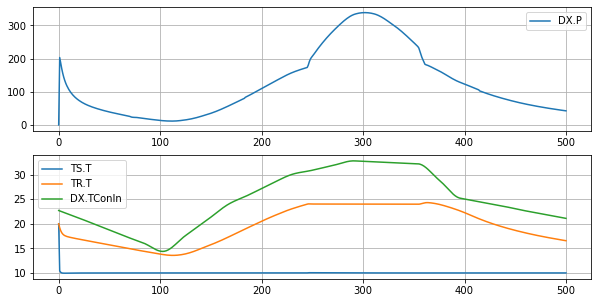

In [2]:

current_folder=os.getcwd()
myfmu=os.path.join(current_folder,'modelicamodel_ModelWithHVACDX_0VariablePMV.fmu')
# myfmu=os.path.join(current_folder,'Buildings_Utilities_Comfort_Validation_FangerCBE.fmu')

fmuinpy=pyfmi.load_fmu(myfmu)

res=fmuinpy.simulate(180*3600*24,181*3600*24)

# In[ ]:
PMVvar=[k for k in res.keys() if 'Comfort.PMV' in k]
df=res2df(res,PMVvar)

figure(figsize=(10,5))
df.plot()


vars=['DX.P', 'DX.QSen_flow', 'DX.QLat_flow','SP_TSA.y', 'TS.T', 'TR.T','DX.TConIn']
df=res2df(res,vars)
figure(figsize=(10,5))
ax=subplot(211)
df['DX.P'].plot(ax=ax,grid=True,legend='Power[W]')
ax=subplot(212)
df[['TS.T','TR.T','DX.TConIn']].apply(lambda x: x-273.15).plot(ax=ax,grid=True)